In [24]:
# This code is simply about some EDA about the virat and how he lost his wicket
# So lets start to do it...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r'D:\Imarticus\Class work\Self Learn projects\final_report.csv')
data.head(10)

,How_out,wicket,Fielder,Bowler,Runs,Inns,Opposition,Ground,Start_Date,pace
0,lbw,1,NaN,KMDN Kulasekara,12,1,v Sri Lanka,Dambulla,18-08-2008,right-arm pace
1,caught,1,CK Kapugedera,T Thushara,37,2,v Sri Lanka,Dambulla,20-08-2008,left-arm pace
2,run out,1,NaN,NaN,25,1,v Sri Lanka,Colombo (RPS),24-08-2008,0
3,bowled,1,NaN,T Thushara,54,1,v Sri Lanka,Colombo (RPS),27-08-2008,left-arm pace
4,lbw,1,NaN,KMDN Kulasekara,31,2,v Sri Lanka,Colombo (RPS),29-08-2008,right-arm pace
5,not out,0,NaN,NaN,2,1,v Sri Lanka,Colombo (RPS),14-09-2009,0
6,caught,1,Umar Gul,Shahid Afridi,16,2,v Pakistan,Centurion,26-09-2009,right-arm spin
7,TDNB,0,NaN,NaN,-,0,v Australia,Centurion,28-09-2009,0
8,not out,0,NaN,NaN,79,2,v West Indies,Johannesburg,30-09-2009,0
9,caught,1,SR Watson,AC Voges,30,2,v Australia,Vadodara,25-10-2009,left-arm spin


In [3]:
data['wicket'].value_counts()

1    206
0     48
Name: wicket, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   How_out     254 non-null    object
 1   wicket      254 non-null    int64 
 2   Fielder     151 non-null    object
 3   Bowler      194 non-null    object
 4   Runs        254 non-null    object
 5   Inns        254 non-null    int64 
 6   Opposition  254 non-null    object
 7   Ground      254 non-null    object
 8   Start_Date  254 non-null    object
 9   pace        254 non-null    object
dtypes: int64(2), object(8)
memory usage: 20.0+ KB


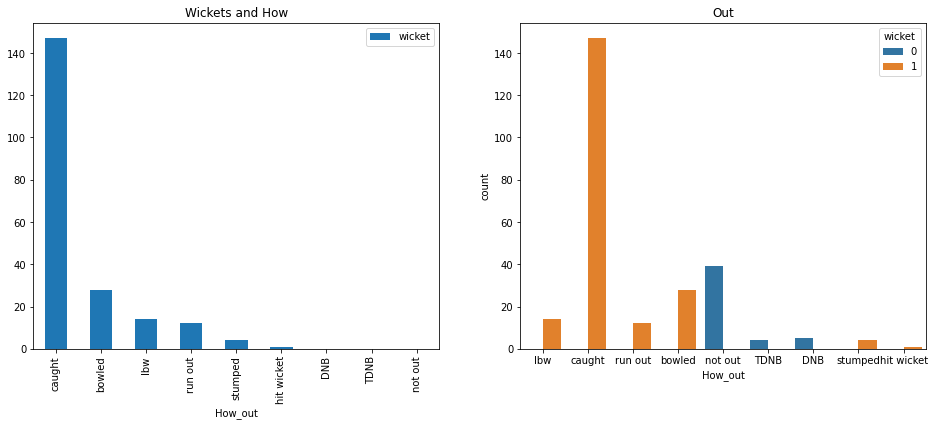

In [38]:
f,ax = plt.subplots(1,2,figsize=(16,6))
data[['How_out','wicket']].groupby('How_out').sum().sort_values('wicket',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title('Wickets and How')
sns.countplot('How_out',hue='wicket',data= data,ax=ax[1])
ax[1].set_title('Out')
plt.show()

In [21]:
# Virat has been lost is wicket most of the times by getting caught. Let see with which team he has lost his wicket mostly

In [81]:
pd.crosstab(data.Opposition,data.wicket).T.style.background_gradient()

Opposition,v Afghanistan,v Australia,v Bangladesh,v England,v Ireland,v Netherlands,v New Zealand,v Pakistan,v South Africa,v Sri Lanka,v U.A.E.,v West Indies,v Zimbabwe
wicket,,,,,,,,,,,,,
0,1,5,3,4,1,0,3,2,7,10,1,8,3
1,1,38,9,29,1,1,23,11,20,37,0,31,5


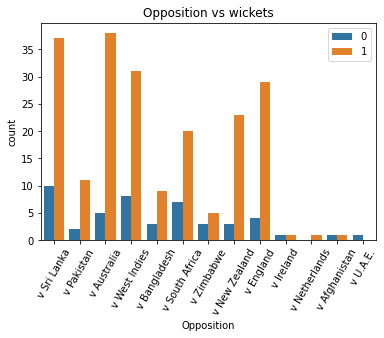

In [78]:
sns.countplot('Opposition',hue='wicket',data=data)
plt.xticks(rotation=60)
plt.title('Opposition vs wickets')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# We can see that he has lost the wicket most of the time when we played against Australia and with srilanka 
# But when compared to Australia the percent he got out is lesser

In [22]:
# let create a function to do some Analysis in the features
def columndist(df, maxgraph, graphperrow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col]>1 and nunique[col]<70]]
    nrow, ncol = df.shape
    colname = list(df)
    graphrow = (ncol+graphperrow-1/graphperrow)
    plt.figure(figsize=(12*graphperrow,8*graphrow), dpi = 80)
    for i in range(min(ncol,maxgraph)):
        plt.subplot(graphrow,graphperrow,i+1)
        colndf = df.iloc[:,i]
        if (not np.issubdtype(type(colndf.iloc[0]),np.number)):
            value_count = colndf.value_counts()
            value_count.plot.bar()
        else:
            colndf.hist()
        plt.title(f'{colname[i]}')
        plt.xticks(rotation=90)
    plt.show()
    

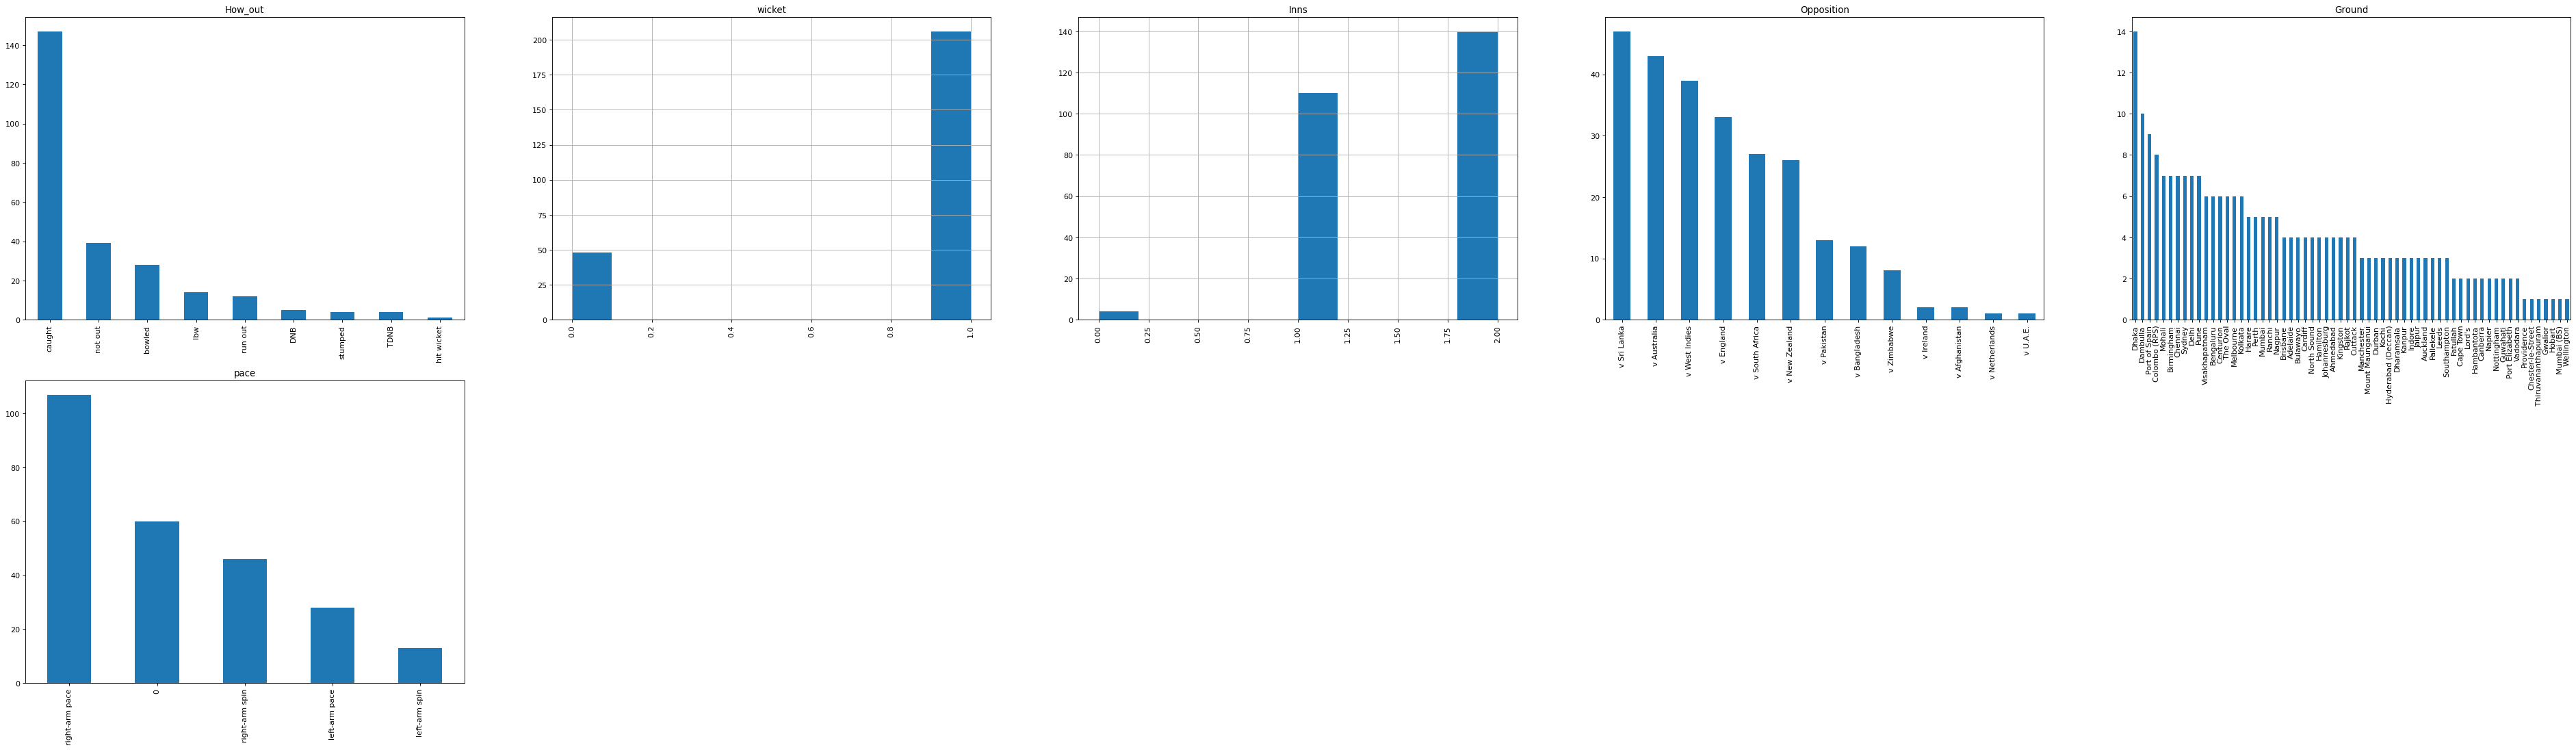

In [5]:
columndist(data,10,5)

In [7]:
data.describe(include='all')

,How_out,wicket,Fielder,Bowler,Runs,Inns,Opposition,Ground,Start_Date,pace
count,254,254.000000,151,194,254,254.000000,254,254,254,254
unique,9,NaN,108,102,116,NaN,13,62,254,5
top,caught,NaN,KC Sangakkara,TG Southee,0,NaN,v Sri Lanka,Dhaka,30-05-2010,right-arm pace
freq,147,NaN,7,6,13,NaN,47,14,1,107
mean,NaN,0.811024,NaN,NaN,NaN,1.535433,NaN,NaN,NaN,NaN
std,NaN,0.392263,NaN,NaN,NaN,0.530423,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [9]:
data[data['How_out'].isin(['TDNB' , 'DNB' , 'run out'])]

,How_out,wicket,Fielder,Bowler,Runs,Inns,Opposition,Ground,Start_Date,pace
2,run out,1,NaN,NaN,25,1,v Sri Lanka,Colombo (RPS),24-08-2008,0
7,TDNB,0,NaN,NaN,-,0,v Australia,Centurion,28-09-2009,0
14,TDNB,0,NaN,NaN,-,0,v Sri Lanka,Delhi,27-12-2009,0
21,DNB,0,NaN,NaN,-,1,v South Africa,Gwalior,24-02-2010,0
23,run out,1,NaN,NaN,0,1,v Zimbabwe,Bulawayo,28-05-2010,0
41,run out,1,NaN,NaN,22,1,v South Africa,Johannesburg,15-01-2011,0
47,run out,1,NaN,NaN,34,2,v Ireland,Bengaluru,06-03-2011,0
58,run out,1,NaN,NaN,94,1,v West Indies,Kingston,16-06-2011,0
75,run out,1,NaN,NaN,77,2,v Sri Lanka,Perth,08-02-2012,0
111,DNB,0,NaN,NaN,-,2,v Zimbabwe,Bulawayo,01-08-2013,0


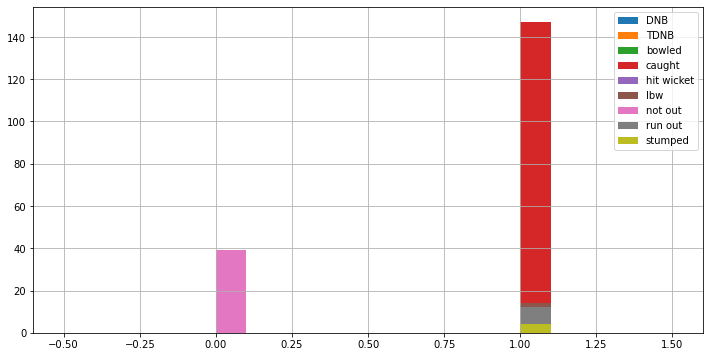

In [23]:
plt.figure(figsize=(12,6))
dis=data.groupby('How_out')['wicket'].hist(legend=True)
plt.show()

<AxesSubplot:xlabel='None,How_out'>

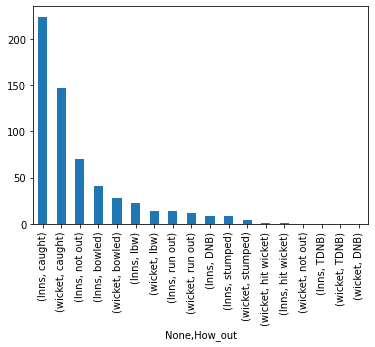

In [11]:
data.groupby('How_out').sum().unstack().sort_values(ascending=False).plot(kind='bar',stacked=False)

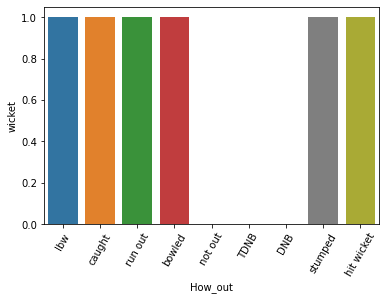

In [12]:
sns.barplot(data['How_out'],data['wicket'])
plt.xticks(rotation=60)
plt.show()

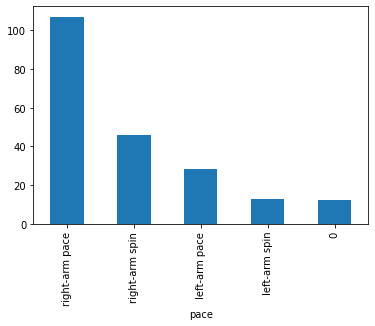

In [20]:
data[data['wicket']==1].groupby(data['pace']).size().sort_values(ascending=False).plot.bar()
plt.show()

In [ ]:
# Virat lost his wickets mostly when he faced Right_arm pace and also he has played mostly againt the same pacers only
# So it might be also reason he lost his wicket against that pace

In [ ]:
data=data.drop(data[data['How_out'].isin(['TDNB' , 'DNB' , 'run out'])].index)

In [ ]:
sns.countplot(data['How_out'])

In [ ]:
data['How_out'].value_counts()

In [ ]:
data['pace'].value_counts()

In [ ]:
data['wicket'].value_counts()

In [ ]:
data

In [ ]:
data.groupby('Ground')['wicket'].sum().sort_values(ascending=False)

In [ ]:
data['Opposition'].value_counts()

In [ ]:
data[data['Opposition']==7]

In [ ]:
data.groupby('pace')['wicket'].sum().sort_values(ascending=False)

In [ ]:
pd.set_option('display.max_row',150)
grp = data['wicket'].groupby(data['Bowler']).sum().sort_values(ascending=False)
grp = dict(grp)
grp

In [ ]:
grd = dict(data.groupby('Ground')['wicket'].sum().sort_values(ascending=False))
grd

In [ ]:
dict(data.groupby('Opposition')['wicket'].sum().sort_values(ascending=False))

In [ ]:
dict(data.groupby('How_out')['wicket'].sum().sort_values(ascending=False))

In [ ]:
## virat kholi has lost his wicket most times when he faced right_arm pace bowlers hence there is more probabilty that i will 
## happen again
clean = {'pace':{'right-arm pace':4,'right-arm spin':3,'left-arm pace':2,'left-arm spin':1},
            'Bowler': grp,
             'Ground': grd ,
         'Opposition':{'v Australia': 9,
 'v Sri Lanka': 8,
 'v West Indies': 7,
 'v England': 7,
 'v New Zealand': 6,
 'v South Africa': 5,
 'v Pakistan': 4,
 'v Bangladesh': 3,
 'v Zimbabwe': 2,
 'v Netherlands': 1,
 'v Afghanistan': 1,
 'v U.A.E.': 0,
 'v Ireland': 0},
        'How_out':{'caught': 5,
 'bowled': 4,
 'lbw': 3,
 'stumped': 2,
 'hit wicket': 1,
 'not out': 0} 
        }
data.replace(clean, inplace=True)

In [ ]:
data.fillna(0,inplace=True)
data.drop(['Fielder','Start_Date'],1,inplace=True)
data

In [ ]:
x= data.drop('wicket',1)
y= data['wicket']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.25, random_state= 7)
x_train

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
log_model.score(x_test,y_test)

In [ ]:
x_mine = [[5,3,66,2,7,7, 3]]
x_mine =  pd.DataFrame(x_mine, columns= x.columns)
x_mine

In [ ]:
y_mine= log_model.predict(x_mine)
y_mine

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))

In [6]:
!pip -h


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help 